In [2]:
import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

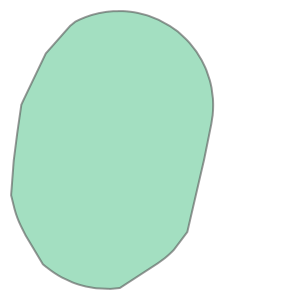

In [7]:
scope = gpd.read_file(r"C:\Users\abdul\Dropbox (MIT)\PhD Thesis\Madina\madina\workflows\Cities\broadway_baseline\Data\NYC_network_broadway_buffer_existing.geojson")
scope_boundary = scope['geometry'].unary_union.convex_hull
scope_boundary
# data_layers = ['Amenities_PT_6538.geojson', 'Home_adj_PT_6538.geojson', 'Jobs_PT_6538.geojson', 'metro_updated_line_ent_st_2023-07-14-ALL-NYC.geojson', 'Parks_PT_6538.geojson', 'Schools_PT_6538.geojson']
data_layers = [
    'Amenities_PT_6538_distributed.geojson',
    'Home_adj_PT_6538.geojson',
    'Jobs_PT_6538_distributed.geojson',
    'metro_updated_line_ent_st_2023-07-14-ALL-NYC.geojson',
    'Parks_PT_6538_distributed.geojson', 
    'Schools_PT_6538.geojson'
]
data_folder = 'Cities\\NYC\Data\\'
output_folder = 'Cities\\broadway_baseline\\Data\\'
for layer in data_layers:
    layer_gdf = gpd.read_file(data_folder + layer, engine='pyogrio')
    layer_gdf = gpd.clip(layer_gdf, scope_boundary)
    layer_gdf.to_file(output_folder + layer, driver="GeoJSON", engine='pyogrio')  
    print (layer)


Amenities_PT_6538_distributed.geojson
Home_adj_PT_6538.geojson
Jobs_PT_6538_distributed.geojson
metro_updated_line_ent_st_2023-07-14-ALL-NYC.geojson
Parks_PT_6538_distributed.geojson
Schools_PT_6538.geojson


In [9]:
broadway_parks = gpd.read_file(r"C:\Users\abdul\Dropbox (MIT)\PhD Thesis\Madina\madina\workflows\Cities\broadway_intervention_with_parks\Data\NYC_broadway_newparkpoints.geojson", engine='pyogrio')
other_parks = gpd.read_file(r"C:\Users\abdul\Dropbox (MIT)\PhD Thesis\Madina\madina\workflows\Cities\broadway_intervention_with_parks\Data\Parks_PT_6538_distributed.geojson", engine='pyogrio')


In [10]:
broadway_parks.explore()

In [11]:
import pandas as pd
all_parks = pd.concat([broadway_parks, other_parks])

In [12]:
all_parks[["geometry", "area_sqm"]].to_file('Cities\\broadway_intervention_with_parks\\Data\\broadway_parks_with_city_parks.geojson', driver="GeoJSON", engine='pyogrio')  